In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import List, Tuple

class GeometricDistribution:
    def __init__(self, p: float):
        """
        Initialize Geometric distribution with probability of success p
        
        Args:
            p (float): Probability of success, must be between 0 and 1
        """
        if not 0 < p <= 1:
            raise ValueError("p must be between 0 and 1")
        self.p = p
        self.theta = 1/p  # Expected number of trials

    def pmf(self, x: int) -> float:
        """Calculate probability mass function P(X = x)"""
        if x < 1:
            return 0
        return (1 - self.p)**(x-1) * self.p

    def simulate(self, size: int) -> np.ndarray:
        """
        Generate random samples from the geometric distribution
        
        Args:
            size (int): Number of samples to generate
            
        Returns:
            np.ndarray: Array of samples
        """
        return np.random.geometric(self.p, size)

    @staticmethod
    def mle_estimate(data: np.ndarray) -> Tuple[float, float]:
        """
        Calculate MLE estimates for p and theta
        
        Args:
            data (np.ndarray): Observed data
            
        Returns:
            Tuple[float, float]: (p_hat, theta_hat)
        """
        theta_hat = np.mean(data)
        p_hat = 1/theta_hat
        return p_hat, theta_hat

    @staticmethod
    def unbiased_p_estimate(data: np.ndarray) -> float:
        """
        Calculate unbiased estimate for p
        
        Args:
            data (np.ndarray): Observed data
            
        Returns:
            float: Unbiased estimate of p
        """
        n = len(data)
        return (n-1)/(np.sum(data))

def plot_geometric_distribution(p: float, max_x: int = 10):
    """
    Plot PMF of geometric distribution
    
    Args:
        p (float): Probability of success
        max_x (int): Maximum x value to plot
    """
    geo = GeometricDistribution(p)
    x = np.arange(1, max_x + 1)
    pmf = [geo.pmf(xi) for xi in x]
    
    plt.figure(figsize=(12, 6))
    
    # Bar plot
    plt.bar(x, pmf, alpha=0.5, label=f'PMF (p={p:.2f})')
    plt.plot(x, pmf, 'ro-', alpha=0.7)
    
    plt.title(f'Geometric Distribution PMF (p={p:.2f})')
    plt.xlabel('Number of trials until first success (x)')
    plt.ylabel('Probability P(X = x)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

def compare_estimators(p_true: float, sample_sizes: List[int], n_simulations: int = 1000):
    """
    Compare MLE and unbiased estimators for different sample sizes
    
    Args:
        p_true (float): True probability of success
        sample_sizes (List[int]): List of sample sizes to test
        n_simulations (int): Number of simulations for each sample size
    """
    geo = GeometricDistribution(p_true)
    
    # Store results
    mle_estimates = []
    unbiased_estimates = []
    
    for n in sample_sizes:
        mle_p = []
        unbiased_p = []
        
        for _ in range(n_simulations):
            # Generate sample
            data = geo.simulate(n)
            
            # Calculate estimates
            p_hat, _ = geo.mle_estimate(data)
            p_unbiased = geo.unbiased_p_estimate(data)
            
            mle_p.append(p_hat)
            unbiased_p.append(p_unbiased)
        
        mle_estimates.append(mle_p)
        unbiased_estimates.append(unbiased_p)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    
    # Box plots for MLE
    plt.boxplot(mle_estimates, positions=np.array(range(len(sample_sizes)))*2-0.3,
                widths=0.6, labels=sample_sizes, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='black'),
                flierprops=dict(marker='o', markerfacecolor='lightblue'))
    
    # Box plots for Unbiased
    plt.boxplot(unbiased_estimates, positions=np.array(range(len(sample_sizes)))*2+0.3,
                widths=0.6, labels=sample_sizes, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='black'),
                flierprops=dict(marker='o', markerfacecolor='lightgreen'))
    
    # Add true p line
    plt.axhline(y=p_true, color='r', linestyle='--', label='True p')
    
    plt.title('Comparison of MLE and Unbiased Estimators')
    plt.xlabel('Sample Size')
    plt.ylabel('Estimated p')
    plt.legend(['True p', 'MLE', 'Unbiased'])
    plt.grid(True, alpha=0.3)
    plt.show()


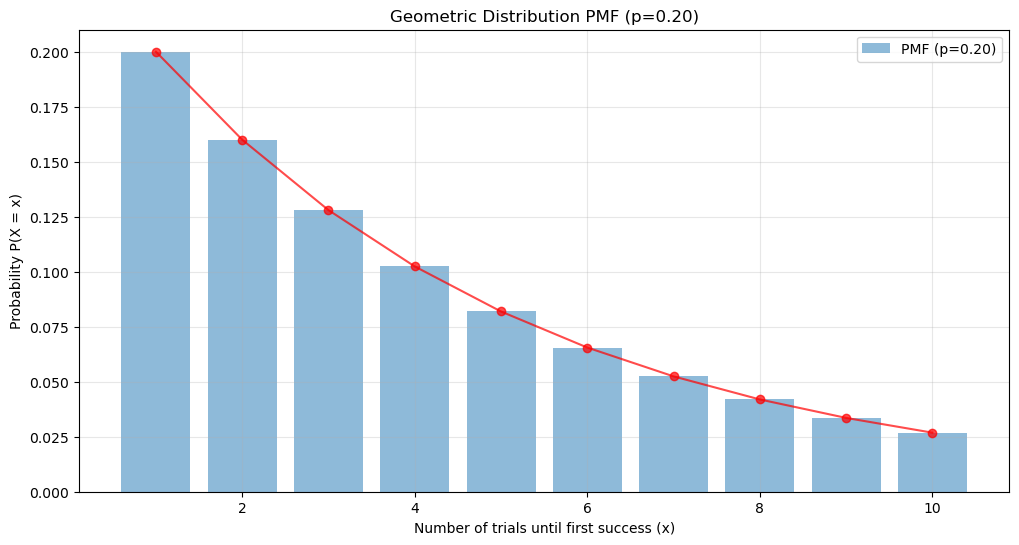

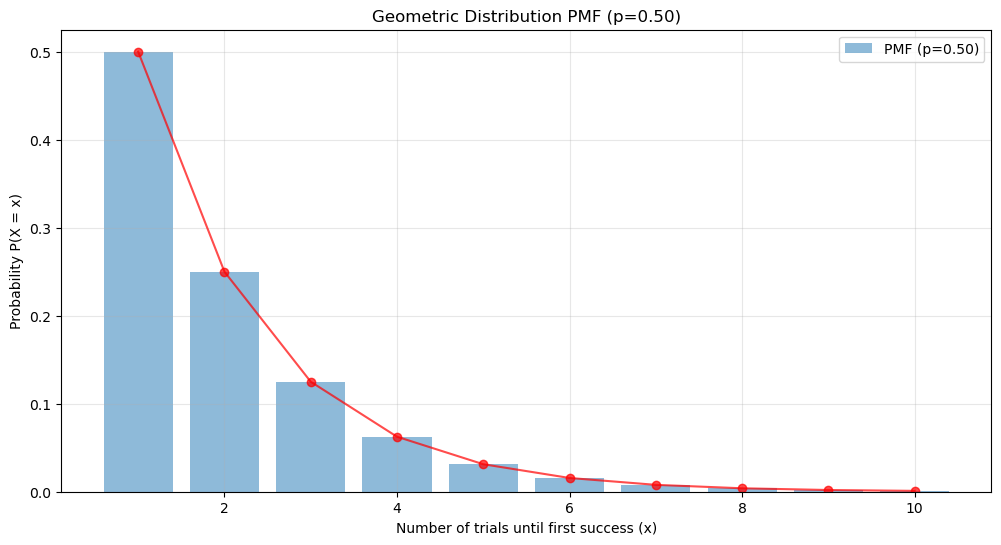

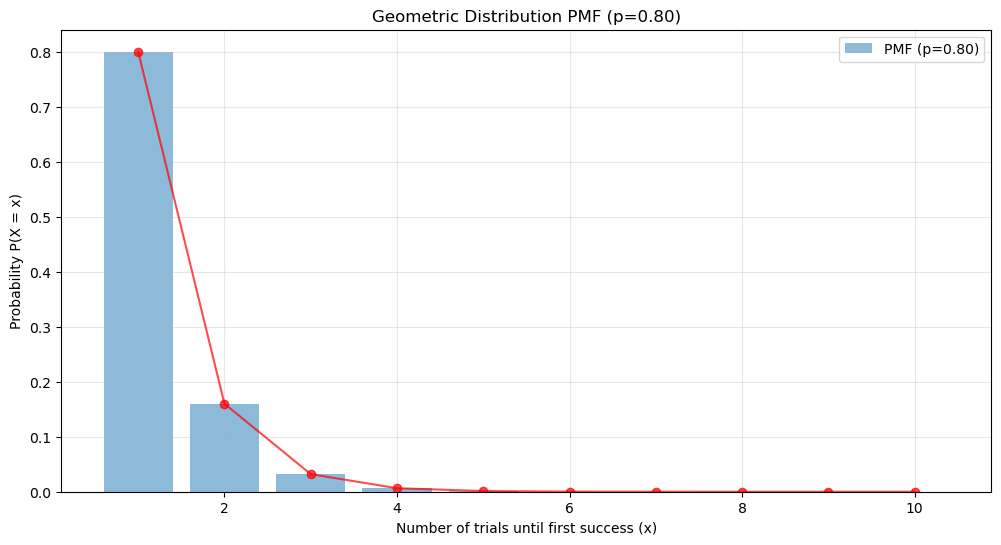

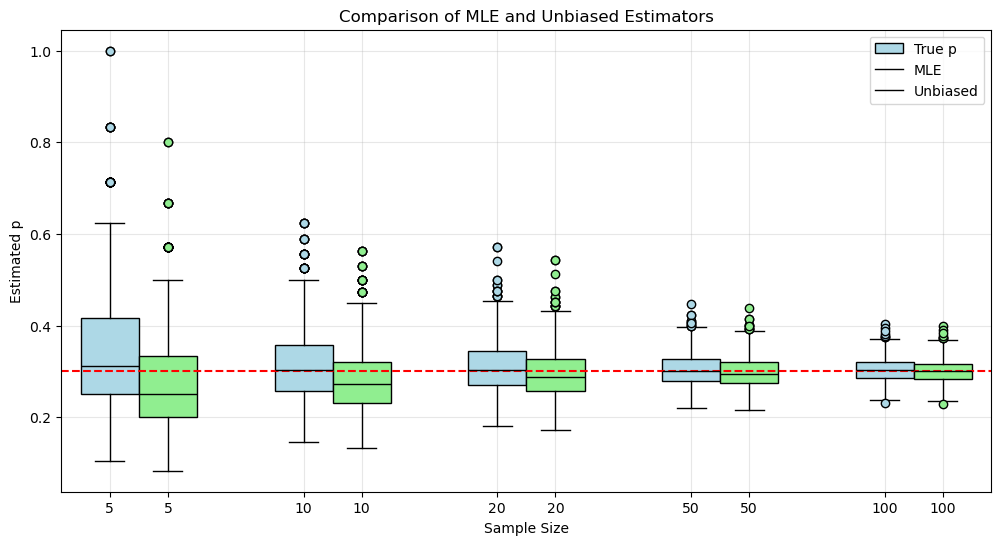


Sample data: [1 1 5 2 7 1 2 1 2 5]

True p: 0.300
MLE estimate of p: 0.370
Unbiased estimate of p: 0.333
MLE estimate of θ: 2.700


In [3]:
# Example usage
if __name__ == "__main__":
    # Plot PMF for different p values
    for p in [0.2, 0.5, 0.8]:
        plot_geometric_distribution(p)
    
    # Compare estimators
    p_true = 0.3
    sample_sizes = [5, 10, 20, 50, 100]
    compare_estimators(p_true, sample_sizes)
    
    # Example with single sample
    geo = GeometricDistribution(p=0.3)
    sample_data = geo.simulate(10)
    print("\nSample data:", sample_data)
    
    p_hat, theta_hat = geo.mle_estimate(sample_data)
    p_unbiased = geo.unbiased_p_estimate(sample_data)
    
    print(f"\nTrue p: {0.3:.3f}")
    print(f"MLE estimate of p: {p_hat:.3f}")
    print(f"Unbiased estimate of p: {p_unbiased:.3f}")
    print(f"MLE estimate of θ: {theta_hat:.3f}")